In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# 운영 체제 정보를 확인하고, matplotlib을 사용하여 그래프 그릴 준비하기
import platform
import matplotlib.pyplot as plt

%matplotlib inline

path = "c:/Windows/Fonts/malgun.ttf"

from matplotlib import font_manager, rc
if platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Sorry')

plt.rcParams['axes.unicode_minus'] = False

In [3]:
import tensorflow as tf

# 두 개의 행과 세 개의 열을 가진 실수 행렬
t = tf.constant([[1., 2., 3.], [4., 5., 6.]]) # 행렬
t

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [4]:
print(t.shape)
print(t.dtype)

(2, 3)
<dtype: 'float32'>


In [5]:
t[:, 1:]

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 3.],
       [5., 6.]], dtype=float32)>

In [6]:
t[..., 1, tf.newaxis]

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[2.],
       [5.]], dtype=float32)>

In [7]:
t + 10

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[11., 12., 13.],
       [14., 15., 16.]], dtype=float32)>

In [8]:
tf.square(t)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)>

In [9]:
t @ tf.transpose(t)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[14., 32.],
       [32., 77.]], dtype=float32)>

In [10]:
tf.constant(42)

<tf.Tensor: shape=(), dtype=int32, numpy=42>

In [11]:
import numpy as np
a = np.array([2., 4., 5.])
tf.constant(a)

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([2., 4., 5.])>

In [12]:
t.numpy()

array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)

In [14]:
tf.square(a)

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([ 4., 16., 25.])>

In [15]:
np.square(t)

array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)

In [16]:
t2 = tf.constant(40., dtype=tf.float64)
tf.constant(2.0) + tf.cast(t2, tf.float32)

<tf.Tensor: shape=(), dtype=float32, numpy=42.0>

In [17]:
v = tf.Variable([[1., 2., 3.], [4., 5., 6.]])
v

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [18]:
v.assign(2 * v)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2.,  4.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [19]:
v[0, 1].assign(42)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2., 42.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [20]:
v[:, 2].assign([0., 1.])

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2., 42.,  0.],
       [ 8., 10.,  1.]], dtype=float32)>

In [21]:
v.scatter_nd_update(indices=[[0, 0], [1, 2]], updates=[100., 200.])

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[100.,  42.,   0.],
       [  8.,  10., 200.]], dtype=float32)>

In [22]:
def huber_fn(y_true, y_pred):
    error = y_true - y_pred
    is_small_error = tf.abs(error) < 1
    squared_loss = tf.square(error) / 2
    linear_loss  = tf.abs(error) - 0.5
    return tf.where(is_small_error, squared_loss, linear_loss)

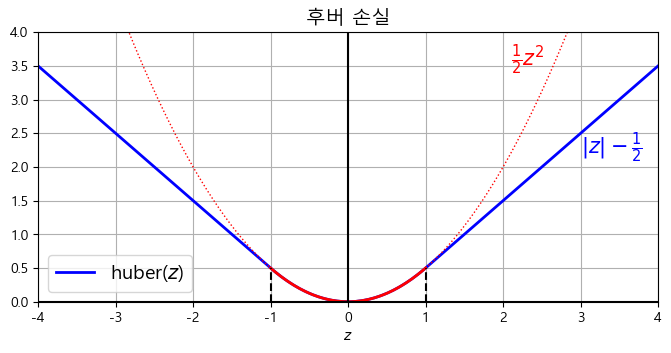

In [23]:
plt.figure(figsize=(8, 3.5))
z = np.linspace(-4, 4, 200)
z_center = np.linspace(-1, 1, 200)
plt.plot(z, huber_fn(0, z), "b-", linewidth=2, label="huber($z$)")
plt.plot(z, z ** 2 / 2, "r:", linewidth=1)
plt.plot(z_center, z_center ** 2 / 2, "r", linewidth=2)
plt.plot([-1, -1], [0, huber_fn(0., -1.)], "k--")
plt.plot([1, 1], [0, huber_fn(0., 1.)], "k--")
plt.gca().axhline(y=0, color='k')
plt.gca().axvline(x=0, color='k')
plt.text(2.1, 3.5, r"$\frac{1}{2}z^2$", color="r", fontsize=15)
plt.text(3.0, 2.2, r"$|z| - \frac{1}{2}$", color="b", fontsize=15)
plt.axis([-4, 4, 0, 4])
plt.grid(True)
plt.xlabel("$z$")
plt.legend(fontsize=14)
plt.title("후버 손실", fontsize=14)
plt.show()

In [24]:
# 캘리포니아 주택 데이터셋을 로드, 분할 및 스케일을 조정한 다음 간단한 케라스 모델을 생성.

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target.reshape(-1, 1), random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

input_shape = X_train.shape[1:]

tf.keras.utils.set_random_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation="relu", kernel_initializer="he_normal",
                          input_shape=input_shape),
    tf.keras.layers.Dense(1),
])

In [25]:
model.compile(loss=huber_fn, optimizer="nadam", metrics=["mae"])
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.7494 - mae: 1.1371 - val_loss: 0.3474 - val_mae: 0.6522
Epoch 2/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2607 - mae: 0.5681 - val_loss: 0.2553 - val_mae: 0.5383


In [27]:
model.save("my_model_with_a_custom_loss.keras")

In [28]:
model = tf.keras.models.load_model("my_model_with_a_custom_loss.keras",
                                   custom_objects={"huber_fn": huber_fn})

In [29]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2188 - mae: 0.5096 - val_loss: 0.2129 - val_mae: 0.4876
Epoch 2/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1990 - mae: 0.4809 - val_loss: 0.1891 - val_mae: 0.4610


In [39]:
def create_huber(threshold=1.0):
    def huber_fn(y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) < threshold
        squared_loss = tf.square(error) / 2
        linear_loss = threshold * tf.abs(error) - threshold ** 2 / 2
        return tf.where(is_small_error, squared_loss, linear_loss)
    return huber_fn

model.compile(loss=create_huber(2.0), optimizer='nadam')

In [37]:
model.compile(loss=create_huber(2.0), optimizer="nadam", metrics=["mae"])

In [40]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2148 - val_loss: 0.2084
Epoch 2/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/step - loss: 0.2054 - val_loss: 0.1807


In [41]:
model.save("my_model_with_a_custom_loss_threshold_2.keras")

In [42]:
model = tf.keras.models.load_model("my_model_with_a_custom_loss_threshold_2.keras",
                                   custom_objects={"huber_fn": create_huber(2.0)})

In [43]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2000 - val_loss: 0.1853
Epoch 2/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1959 - val_loss: 0.1976


In [48]:
class HuberLoss(tf.keras.losses.Loss):
    def __init__(self, threshold=1.0, **kwargs):
        self.threshold = threshold
        super().__init__(**kwargs)

    def call(self, y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) < self.threshold
        squared_loss = tf.square(error) / 2
        linear_loss  = self.threshold * tf.abs(error) - self.threshold**2 / 2
        return tf.where(is_small_error, squared_loss, linear_loss)

    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "threshold": self.threshold}

In [49]:
tf.keras.utils.set_random_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation="relu", kernel_initializer="he_normal",
                          input_shape=input_shape),
    tf.keras.layers.Dense(1),
])

In [50]:
model.compile(loss=HuberLoss(2.), optimizer="nadam", metrics=["mae"])

In [51]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.0512 - mae: 1.1438 - val_loss: 0.5086 - val_mae: 0.6718
Epoch 2/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3170 - mae: 0.5816 - val_loss: 0.3527 - val_mae: 0.5571


In [52]:
model.save("my_model_with_a_custom_loss_class.keras")

In [53]:
model = tf.keras.models.load_model('my_model_with_a_custom_loss_class.keras',
                                   custom_objects={'HuberLoss':HuberLoss})

In [54]:
def my_softplus(z):
    return tf.math.log(1.0 + tf.exp(z))

def my_glorot_initializer(shape, dtype=tf.float32):
    stddev = tf.sqrt(2. / (shape[0] + shape[1]))
    return tf.random.normal(shape, stddev=stddev, dtype=dtype)

def my_l1_regularizer(weights):
    return tf.reduce_sum(tf.abs(0.01 * weights))

def my_positive_weights(weights): # tf.nn.relu(weight)와 반환값 동일
    return tf.where(weights < 0., tf.zeros_like(weights), weights)

In [55]:
layer = tf.keras.layers.Dense(1, activation=my_softplus, # 사용자 정의 활성화 함수
                              kernel_initializer=my_glorot_initializer, # 사용자 정의 글로럿 초기화
                              kernel_regularizer=my_l1_regularizer, # 사용자 정의 L1 규제
                              kernel_constraint=my_positive_weights) # 양수인 가중치만 남기는 사용자 정의 제한

In [59]:
class MyL1Regularizer(tf.keras.regularizers.Regularizer):
    def __init__(self, factor):
        self.factor = factor

    def __call__(self, weights):
        return tf.reduce_sum(tf.abs(self.factor * weights))

    def get_config(self):
        return {"factor": self.factor}

In [71]:
# Setting the random seed
tf.keras.utils.set_random_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation="relu", kernel_initializer="he_normal",
                          input_shape=input_shape),
    tf.keras.layers.Dense(1, activation=my_softplus,
                          kernel_initializer=my_glorot_initializer,
                          kernel_regularizer=my_l1_regularizer(0.01),
                          kernel_constraint=my_positive_weights)
])
model.compile(loss="mse", optimizer="nadam", metrics=["mae"])
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))
model.save("my_model_with_many_custom_parts.keras")
model = tf.keras.models.load_model(
    "my_model_with_many_custom_parts.keras",
    custom_objects={
       "my_l1_regularizer": my_l1_regularizer,
       "my_positive_weights": my_positive_weights,
       "my_glorot_initializer": my_glorot_initializer,
       "my_softplus": my_softplus,
    }
)
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

ValueError: Could not interpret regularizer identifier: 9.999999747378752e-05

In [72]:
tf.keras.utils.set_random_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation="relu", kernel_initializer="he_normal",
                          input_shape=input_shape),
    tf.keras.layers.Dense(1),
])

In [73]:
model.compile(loss="mse", optimizer="nadam", metrics=[create_huber(2.0)])

In [74]:
model.fit(X_train_scaled, y_train, epochs=2)

Epoch 1/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 761us/step - huber_fn: 1.0788 - loss: 2.5942
Epoch 2/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - huber_fn: 0.3403 - loss: 0.7644


In [75]:
precision = tf.keras.metrics.Precision()
precision([0, 1, 1, 1, 0, 1, 0, 1], [1, 1, 0, 1, 0, 1, 0, 1])

<tf.Tensor: shape=(), dtype=float32, numpy=0.8>

In [76]:
precision([0, 1, 0, 0, 1, 0, 1, 1], [1, 0, 1, 1, 0, 0, 0, 0])

<tf.Tensor: shape=(), dtype=float32, numpy=0.5>

In [77]:
precision.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.5>

In [78]:
precision.variables

[<KerasVariable shape=(1,), dtype=float32, path=precision/true_positives>,
 <KerasVariable shape=(1,), dtype=float32, path=precision/false_positives>]

In [85]:
precision.reset_states() # 두 변수가 0.0으로 초기화된다

AttributeError: 'Precision' object has no attribute 'reset_states'

In [86]:
class HuberMetric(tf.keras.metrics.Metric):
    def __init__(self, threshold=1.0, **kwargs):
        super().__init__(**kwargs) # 기본 매개변수 처리(ex. dtype)
        self.threshold = threshold
        self.huber_fn = create_huber(threshold)
        self.total = self.add_weight('total', initializer='zeros')
        self.count = self.add_weight('count', initializer='zeros')

    def update_state(self, y_true, y_pred, sample_weight=None):
        sample_metrics = self.huber_fn(y_true, y_pred)
        self.total.assign_add(tf.reduce_sum(sample_metrics))
        self.count.assign_add(tf.cast(tf.size(y_true), tf.float32))

    def result(self):
        return self.total / self.count

    def get_config(self):
        base_config = super().get_config()
        return {**base_config, 'threshold': self.threshold}

In [87]:
exponential_layer = tf.keras.layers.Lambda(lambda x: tf.exp(x))

In [88]:
class MyDense(tf.keras.layers.Layer):
    def __init__(self, units, activation=None, **kwargs):
        super().__init__(**kwargs)
        self.units = units
        self.activation = tf.keras.activations.get(activation)

    def build(self, batch_input_shape):
        self.kernel = self.add_weight(
            name='kernel', shape=[batch_input_shape[-1], self.units],
            initializer='glorot_normal')
        self.bias = self.add_weight(
            name='bias', shape=[self.units], initializer='zeros')

    def call(self, X):
        return self.activation(X @ self.kernel + self.bias)

    def get_config(self):
        base_config = super().get_config()
        return {**base_config, 'units': self.units,
        'activation': tf.keras.activations.serializer(self.activation)}

In [89]:
class MyMultiLayer(tf.keras.layers.Layer):
    def call(self, X):
        X1, X2 = X
        return X1 + X2, X1 * X2, X1 / X2

In [90]:
class MyGaussianNoise(tf.keras.layers.Layer):
    def __init__(self, stddev, **kwargs):
        super().__init__(**kwargs)
        self.stddev = stddev

    def call(self, X, training=False):
        if training:
            noise = tf.random.normal(tf.shape(X), stddev=self.stddev)
            return X + noise
        else:
            return X

In [92]:
class ResidualBlock(tf.keras.layers.Layer):
    def __init__(self, n_layers, n_neurons, **kwargs):
        super().__init__(**kwargs)
        self.hidden = [tf.keras.layers.Dense(n_neurons, activation='relu',
                                            kernel_initializer='he_normal')
                    for _ in range(n_layers)]

    def call(self, inputs):
        Z = inputs
        for layer in self.hidden:
            Z = layer(Z)
        return inputs + Z

In [94]:
class ResidualRegressor(tf.keras.Model):
    def __init__(self, output_dim, **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = tf.keras.layers.Dense(30, activation='relu',
                                            kernel_initializer='he_normal')
        self.block1 = ResidualBlock(2, 30)
        self.block2 = ResidualBlock(2, 30)
        self.out = tf.keras.layers.Dense(output_dim)

    def call(self, inputs):
        Z = inputs
        for _ in range(1 + 3):
            Z = self.block1(Z)
        Z = self.block2(Z)
        return self.out(Z)

In [95]:
tf.keras.utils.set_random_seed(42)
model = ResidualRegressor(1)
model.compile(loss="mse", optimizer="nadam")
history = model.fit(X_train_scaled, y_train, epochs=2)
score = model.evaluate(X_test_scaled, y_test)
model.save("my_custom_model.keras")

Epoch 1/2


ValueError: Exception encountered when calling ResidualBlock.call().

[1mDimensions must be equal, but are 8 and 30 for '{{node residual_regressor_1/residual_block_1/add}} = AddV2[T=DT_FLOAT](data, residual_regressor_1/residual_block_1/dense_31_1/Relu)' with input shapes: [?,8], [?,30].[0m

Arguments received by ResidualBlock.call():
  • inputs=tf.Tensor(shape=(None, 8), dtype=float32)

In [ ]:
model = tf.keras.models.load_model("my_custom_model.keras")
history = model.fit(X_train_scaled, y_train, epochs=2)
model.predict(X_test_scaled[:3])

In [96]:
class ReconstructingRegressor(tf.keras.Model):
    def __init__(self, output_dim, **kwargs):
        super().__init__(**kwargs)
        self.hidden = [tf.keras.layers.Dense(30, activation="relu",
                                             kernel_initializer="he_normal")
                       for _ in range(5)]
        self.out = tf.keras.layers.Dense(output_dim)
        self.reconstruction_mean = tf.keras.metrics.Mean(
            name="reconstruction_error")

    def build(self, batch_input_shape):
        n_inputs = batch_input_shape[-1]
        self.reconstruct = tf.keras.layers.Dense(n_inputs)
        self.built = True  # super().build(batch_input_shape)에 대한 해결 방법

    def call(self, inputs, training=None):
        Z = inputs
        for layer in self.hidden:
            Z = layer(Z)
        reconstruction = self.reconstruct(Z)
        recon_loss = tf.reduce_mean(tf.square(reconstruction - inputs))
        self.add_loss(0.05 * recon_loss)
        if training:
            result = self.reconstruction_mean(recon_loss)
            self.add_metric(result)
        return self.out(Z)

In [97]:
tf.keras.utils.set_random_seed(42)
model = ReconstructingRegressor(1)
model.compile(loss="mse", optimizer="nadam")
history = model.fit(X_train_scaled, y_train, epochs=5)
y_pred = model.predict(X_test_scaled)

Epoch 1/5


NotImplementedError: Exception encountered when calling ReconstructingRegressor.call().

[1mLayer `add_metric()` method is deprecated add your metric in `Model.compile(metrics=[...]).`[0m

Arguments received by ReconstructingRegressor.call():
  • inputs=tf.Tensor(shape=(None, 8), dtype=float32)
  • training=True

In [98]:
def f(w1, w2):
    return 3 * w1 ** 2 + 2 * w1 * w2

In [99]:
w1, w2 = 5, 3
eps = 1e-6
(f(w1 + eps, w2) - f(w1, w2)) / eps

36.000003007075065

In [100]:
(f(w1, w2 + eps) - f(w1, w2)) / eps

10.000000003174137

In [102]:
w1, w2 = tf.Variable(5.), tf.Variable(3.)
with tf.GradientTape() as tape:
    z = f(w1, w2)

gradients = tape.gradient(z, [w1, w2])
gradients

[<tf.Tensor: shape=(), dtype=float32, numpy=36.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=10.0>]

In [103]:
with tf.GradientTape(persistent=True) as tape:
    z = f(w1, w2)

dz_w1 = tape.gradient(z, w1)
dz_w2 = tape.gradient(z, w2)
del tape

In [107]:
c1, c2 = tf.constant(5.), tf.constant(3.)
with tf.GradientTape() as tape:
    z = f(c1, c2)

gradients = tape.gradient(z, [c1, c2])
gradients

[None, None]

In [108]:
with tf.GradientTape() as tape:
    tape.watch(c1)
    tape.watch(c2)
    z = f(c1, c2)

gradients = tape.gradient(z, [c1, c2])
gradients

[<tf.Tensor: shape=(), dtype=float32, numpy=36.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=10.0>]

In [109]:
def f(w1, w2):
    return 3 * w1 ** 2 + tf.stop_gradient(2 * w1 * w2)

with tf.GradientTape() as tape:
    z = f(w1, w2)

gradients = tape.gradient(z, [w1, w2])
gradients

[<tf.Tensor: shape=(), dtype=float32, numpy=30.0>, None]

In [110]:
x = tf.Variable(1e-50)
with tf.GradientTape() as tape:
    z = tf.sqrt(x)

tape.gradient(z, [x])

[<tf.Tensor: shape=(), dtype=float32, numpy=inf>]

In [111]:
def my_softplus(z):
    return tf.math.log(1 + tf.exp(-tf.abs(z))) + tf.maximum(0., z)

In [112]:
@tf.custom_gradient
def my_softplus(z):
    def my_softplus_gradients(grads):  # grads = 상위 층에서 역전파된 그레이디언트
        return grads * (1 - 1 / (1 + tf.exp(z)))  # 안정적인 소프트플러스 그레이디언트

    result = tf.math.log(1 + tf.exp(-tf.abs(z))) + tf.maximum(0., z)
    return result, my_softplus_gradients

In [113]:
x = tf.Variable([1000.])
with tf.GradientTape() as tape:
    z = my_softplus(x)

z, tape.gradient(z, [x])

(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1000.], dtype=float32)>,
 [<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>])

In [115]:
tf.keras.utils.set_random_seed(42)  # 재현성 보장
l2_reg = tf.keras.regularizers.l2(0.05)
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(30, activation="relu", kernel_initializer="he_normal",
                          kernel_regularizer=l2_reg),
    tf.keras.layers.Dense(1, kernel_regularizer=l2_reg)
])

In [116]:
def random_batch(X, y, batch_size=32):
    idx = np.random.randint(len(X), size=batch_size)
    return X[idx], y[idx]

In [117]:
def print_status_bar(step, total, loss, metrics=None):
    metrics = " - ".join([f"{m.name}: {m.result():.4f}"
                          for m in [loss] + (metrics or [])])
    end = "" if step < total else "\n"
    print(f"\r{step}/{total} - " + metrics, end=end)

In [118]:
tf.keras.utils.set_random_seed(42)

In [121]:
n_epochs = 5
batch_size = 32
n_steps = len(X_train) // batch_size
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
loss_fn = tf.keras.losses.MeanSquaredError()
mean_loss = tf.keras.metrics.Mean()
metrics = [tf.keras.metrics.MeanAbsoluteError()]

In [122]:
for epoch in range(1, n_epochs + 1):
    print(f"Epoch {epoch}/{n_epochs}")
    for step in range(1, n_steps + 1):
        X_batch, y_batch = random_batch(X_train_scaled, y_train)
        with tf.GradientTape() as tape:
            y_pred = model(X_batch, training=True)
            main_loss = tf.reduce_mean(loss_fn(y_batch, y_pred))
            loss = tf.add_n([main_loss] + model.losses)

        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))

        # 추가 코드 - 모델 변수에 제약이 있는 경우
        for variable in model.variables:
            if variable.constraint is not None:
                variable.assign(variable.constraint(variable))

        mean_loss(loss)
        for metric in metrics:
            metric(y_batch, y_pred)

        print_status_bar(step, n_steps, mean_loss, metrics)

    for metric in [mean_loss] + metrics:
        metric.reset_states()

Epoch 1/5


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [123]:
for variable in model.variables:
    if variable.constraint is not None:
        variable.assign(variable.constraint(variable))

In [2]:
import tensorflow as tf
def cube(x):
    return x **3

In [3]:
cube(2)

8

In [4]:
cube(tf.constant(2.0))

<tf.Tensor: shape=(), dtype=float32, numpy=8.0>

In [6]:
tf_cube = tf.function(cube)
tf_cube

In [7]:
tf_cube(2)

<tf.Tensor: shape=(), dtype=int32, numpy=8>

In [8]:
tf_cube(tf.constant(2.0))

<tf.Tensor: shape=(), dtype=float32, numpy=8.0>

In [9]:
@tf.function
def tf_cube(x):
    return x ** 3

In [10]:
tf_cube.python_function(2)

8

In [11]:
import tensorflow as tf
import timeit
from datetime import datetime

In [12]:
# 파이썬 함수 정의.
def a_regular_function(x, y, b):
  x = tf.matmul(x, y)
  x = x + b
  return x

# `a_function_that_uses_a_graph` 는 텐서플로 함수.
a_function_that_uses_a_graph = tf.function(a_regular_function)

# 몇 개의 텐서 생성.
x1 = tf.constant([[1.0, 2.0]])
y1 = tf.constant([[2.0], [3.0]])
b1 = tf.constant(4.0)

orig_value = a_regular_function(x1, y1, b1).numpy()
# 텐서플로 함수를 파이썬 함수처럼 부름.
tf_function_value = a_function_that_uses_a_graph(x1, y1, b1).numpy()
assert(orig_value == tf_function_value)

In [13]:
def inner_function(x, y, b):
  x = tf.matmul(x, y)
  x = x + b
  return x

# `outer_function`을 함수로 만들기 위해 데코레이터 사용.
@tf.function
def outer_function(x):
  y = tf.constant([[2.0], [3.0]])
  b = tf.constant(4.0)

  return inner_function(x, y, b)

#  호출 가능 항목은 'inner_기능'과 'outer_기능'을 포함한 그래프를 생성.
outer_function(tf.constant([[1.0, 2.0]])).numpy()

array([[12.]], dtype=float32)

In [14]:
def simple_relu(x):
  if tf.greater(x, 0):
    return x
  else:
    return 0

# 'tf_simple_relu'는 'simple_relu'를 감싸는 텐서플로우 함수.
tf_simple_relu = tf.function(simple_relu)

print("First branch, with graph:", tf_simple_relu(tf.constant(1)).numpy())
print("Second branch, with graph:", tf_simple_relu(tf.constant(-1)).numpy())

First branch, with graph: 1
Second branch, with graph: 0


In [15]:
#  AutoGraph의 그래프 생성 출력
print(tf.autograph.to_code(simple_relu))

def tf__simple_relu(x):
    with ag__.FunctionScope('simple_relu', 'fscope', ag__.ConversionOptions(recursive=True, user_requested=True, optional_features=(), internal_convert_user_code=True)) as fscope:
        do_return = False
        retval_ = ag__.UndefinedReturnValue()

        def get_state():
            return (do_return, retval_)

        def set_state(vars_):
            nonlocal do_return, retval_
            do_return, retval_ = vars_

        def if_body():
            nonlocal do_return, retval_
            try:
                do_return = True
                retval_ = ag__.ld(x)
            except:
                do_return = False
                raise

        def else_body():
            nonlocal do_return, retval_
            try:
                do_return = True
                retval_ = 0
            except:
                do_return = False
                raise
        ag__.if_stmt(ag__.converted_call(ag__.ld(tf).greater, (ag__.ld(x), 0), None, fscope), if_body

In [16]:
# 그래프 자체
print(tf_simple_relu.get_concrete_function(tf.constant(1)).graph.as_graph_def())

node {
  name: "x"
  op: "Placeholder"
  attr {
    key: "_user_specified_name"
    value {
      s: "x"
    }
  }
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "shape"
    value {
      shape {
      }
    }
  }
}
node {
  name: "Greater/y"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_INT32
        tensor_shape {
        }
        int_val: 0
      }
    }
  }
}
node {
  name: "Greater"
  op: "Greater"
  input: "x"
  input: "Greater/y"
  attr {
    key: "T"
    value {
      type: DT_INT32
    }
  }
}
node {
  name: "cond"
  op: "StatelessIf"
  input: "Greater"
  input: "x"
  attr {
    key: "Tcond"
    value {
      type: DT_BOOL
    }
  }
  attr {
    key: "Tin"
    value {
      list {
        type: DT_INT32
      }
    }
  }
  attr {
    key: "Tout"
    value {
      list {
        type: DT_BOOL
        type: DT_INT32
      }
    }
  